# SVM Modelo

In [ ]:
import pandas as pd
import preprocessing as pp
import formatPredictions as fp
import metrics as m
import datasets as datasets

# Importacion SVM
from sklearn.svm import SVC

# Importacion preprocesamiento
from sklearn.model_selection import train_test_split

# Entrenamiento con todos los features

In [ ]:
dfTrain = datasets.getDataTrain()
dfTrain_feature_engineering = pp.feature_engineering_KNN_SVM_Naive_Bayes(dfTrain)
X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
clf_con_todos_los_features = SVC()
clf_con_todos_los_features.fit(X_train, y_train)
y_pred = clf_con_todos_los_features.predict(X_test)

# Metricas

Accuracy: 0.831874712114233

Precision: 0.7298969072164948

Recall: 0.9473049074818987

F1 Score: 0.5639187574671446

Matriz de confusion: 
[[4710  262]
 [ 833  708]]

AUC-ROC: 



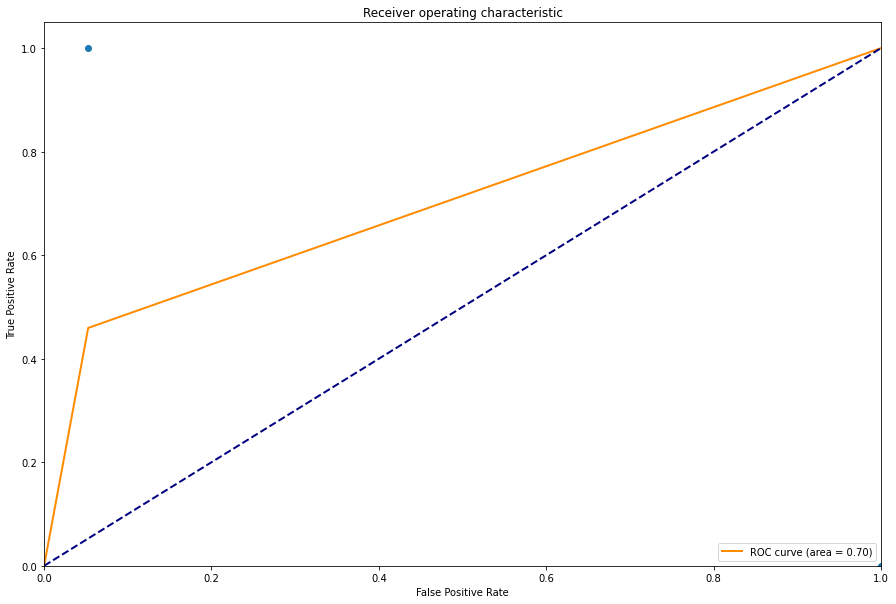

0.7033734141562641

In [ ]:
m.getMetrics(y_test, y_pred)

# Entrenamiento SVM con lineal kernel

In [ ]:
# clf = SVC(kernel='linear', C=5843)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

## No termina la ejecucion con lineal kernel

# Entrenamiento SVM con polinomial kernel

In [ ]:
# metrics = []
# for c in range(1, 100, 10):
#     for d in range(1, 100, 10):
#         for g in range(1, 100, 10):
#             for r in range(1, 100, 10):
#                 clf = SVC(kernel='poly', C=c, degree=d, gamma=g, coef0=r)
#                 clf.fit(X_train, y_train)
#                 metrics.append(
#                     (c, d, g, r, (clf.predict(X_val_dev) == y_val_dev).sum())
#                 )

# dd = pd.DataFrame(metrics, columns=['c', 'degree', 'gamma', 'r', 'correct_in_val-dev'])
# dd[dd['correct_in_val-dev'] == dd['correct_in_val-dev'].max()]

## No termina la ejecucion con lineal kernel

# Entrenamiento con seleccion

In [ ]:
dfTrain = datasets.getDataTrain()
dfTrain_feature_engineering = pp.feature_engineering_TP_primera_parte(dfTrain)
X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
clf_con_seleccion = SVC()
clf_con_seleccion.fit(X_train, y_train)
y_pred = clf_con_seleccion.predict(X_test)

# Metricas

Accuracy: 0.7778289574696761

Precision: 0.6098901098901099

Recall: 0.9569348968863728

F1 Score: 0.3151916706105064

Matriz de confusion: 
[[4733  213]
 [1234  333]]

AUC-ROC: 



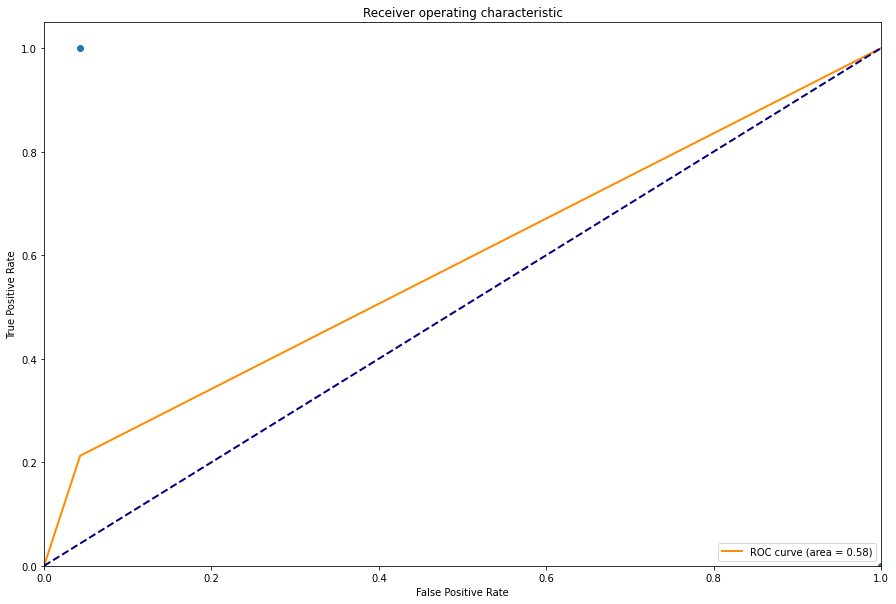

0.5847214369562687

In [ ]:
m.getMetrics(y_test, y_pred)

# Prediccion

In [ ]:
# Obtengo el set para predecir
dfObjetivo = datasets.getDataValidation()

# Elimino columnas "representatividad_poblacional" y "id"
dfObjetivo.drop(columns = ['representatividad_poblacional', 'id'], inplace = True)

# Aplico feature engineering
dfObjetivo_feature_engineering = pp.feature_engineering_KNN_SVM_Naive_Bayes(dfObjetivo)

predicciones = clf_con_todos_los_features.predict(dfObjetivo_feature_engineering)
predicciones

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
fp.exportPredictions(fp.formatPredictions(predicciones), "pd_predictions_svm")